Importación de datos

In [42]:
import plotly.express as px
import pandas as pd
import glob
import os
#creación de estapcio de trabajo
ruta = 'C:/Users/omarj/OneDrive/Documentos/Ucatolica/extensión/data/'
ruta2 = 'C:/Users/omarj/OneDrive/Documentos/Ucatolica/extensión/'
archivos = glob.glob(os.path.join(ruta, '*.xlsx'))
print(f'Se encontro {len(archivos)} archivos Excel')

dataframe =[]

for archivo in archivos:
    print(f'leyendo: {os.path.basename(archivo)}')
    df = pd.read_excel(archivo)
    dataframe.append(df)

df_unificado = pd.concat(dataframe, ignore_index=True, join='outer')

salida = os.path.join(ruta2, 'Agregados-Unificados.csv')
df_unificado.to_csv(salida, index=False, encoding='utf-8')
print(f'✅ Archivos Unificado en: {salida}')
print(df_unificado.head())
print(df_unificado.info())


Se encontro 5 archivos Excel
leyendo: Agregados-2020.xlsx


KeyboardInterrupt: 

C:\Users\omarj\AppData\Local\Temp\ipykernel_1640\2773900279.py:6: DtypeWarning: Columns (14,16,18,20,32) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(ruta, encoding='utf-8')


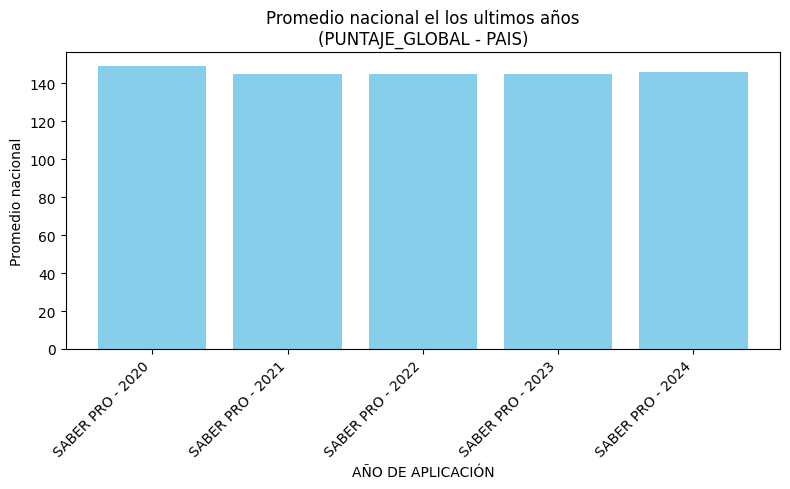

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# 1️⃣ Leer el archivo CSV
ruta = r'C:/Users/omarj/OneDrive/Documentos/Ucatolica/extensión/Agregados-Unificados.csv'
df = pd.read_csv(ruta, encoding='utf-8')

# 2️⃣ Especificar los valores de filtro
Agregacion = 'PAIS' #TOMAMOS LOS PUNTAJES A NIVEL NACIONAL
Medida_agregacion = 'PUNTAJE_GLOBAL'   # VAMOS A TENER PUNTAJES GLOBALES

# 3️⃣ Filtrar según variable2 y variable4
df_filtrado = df[(df['AGREGACION'] == Agregacion) & (df['MEDIDA_AGREGACION'] == Medida_agregacion)]

# 4️⃣ Agrupar por variable1 y calcular la media (o conteo) de la variable5 (razón)
#    Si "razon" es numérica:
resumen = df_filtrado.groupby('EXAMEN')['PROMEDIO_GLOBAL'].mean().reset_index()

# 5️⃣ Graficar en barras
plt.figure(figsize=(8,5))
plt.bar(resumen['EXAMEN'], resumen['PROMEDIO_GLOBAL'], color='skyblue')
plt.xlabel('AÑO DE APLICACIÓN')
plt.ylabel('Promedio nacional')
plt.title(f'Promedio nacional el los ultimos años\n({Medida_agregacion} - {Agregacion})')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


In [ ]:
# Creación de mapa termino segun resultados.
import pandas as pd
import folium
import geopandas as gpd
import matplotlib.pyplot as plt

# Cargar tus datos
# 1️⃣ Leer el archivo CSV
ruta = r'C:/Users/omarj/OneDrive/Documentos/Ucatolica/extensión/Agregados-Unificados.csv'
df = pd.read_csv(ruta, encoding='utf-8')

# 2️⃣ Especificar los valores de filtro
Año = 'SABER PRO - 2024' #TOMAMOS LOS PUNTAJES DEL ULTIMO AÑO
Agregacion = 'DEPARTAMENTO'
Medida_agregacion = 'PUNTAJE_GLOBAL'   # VAMOS A TENER PUNTAJES GLOBALES

# 3️⃣ Filtrar según variable2 y variable4
df_filtrado = df[(df['EXAMEN']== Año)&(df['AGREGACION'] == Agregacion) & (df['MEDIDA_AGREGACION'] == Medida_agregacion)] # Debe tener una columna con el nombre del departamento y una con el valor

# Cargar el mapa geográfico de Colombia
# Puedes usar uno gratuito de DANE o GADM (nivel departamental)
url_geojson = "C:/Users/omarj/OneDrive/Documentos/Ucatolica/extensión/mapas/depto-limpio.json"
colombia = gpd.read_file(url_geojson)

# Visualizar para confirmar
#colombia.plot(edgecolor='black', figsize=(8, 8))
#plt.title("Mapa base de Colombia - Departamentos")
#plt.show()
#print('Columnas disponibles:')
#print(colombia.columns)
#colombia['NOMBRE_DPT'] = colombia['NOMBRE_DPT'].replace({
#    'SANTAFE DE BOGOTA D.C':'BOGOTÁ'
#})
#colombia.to_file(r"C:/Users/omarj/OneDrive/Documentos/Ucatolica/extensión/mapas/depto-limpio.json",
#    driver='GeoJSON')
#print(colombia['NOMBRE_DPT'].unique())
#print(df_filtrado['NOMBRE_DEPARTAMENTO'].unique())

# Unir tus datos con el mapa
colombia = colombia.merge(df_filtrado, left_on='NOMBRE_DPT', right_on='NOMBRE_DEPARTAMENTO', how='left')
#print(colombia.columns)
#print(colombia.head())

C:\Users\omarj\AppData\Local\Temp\ipykernel_13724\1457951279.py:10: DtypeWarning: Columns (14,16,18,20,32) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(ruta, encoding='utf-8')


In [ ]:
colombia.plot(edgecolor='black', figsize=(8, 8))
plt.title("Mapa base de Colombia - Departamentos")
plt.show()

✅ Mapa guardado como 'mapas/mapa_saberpro.png'


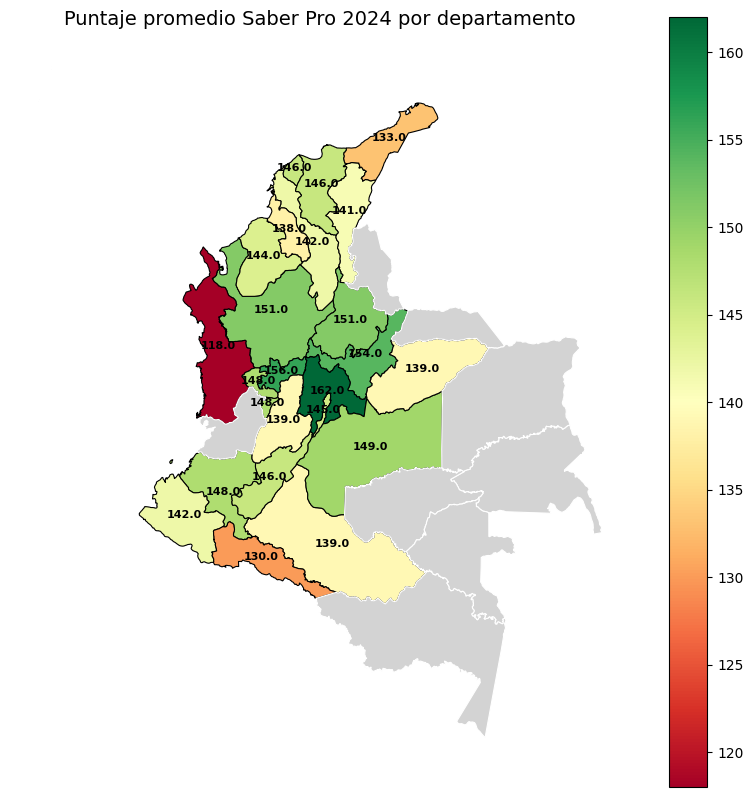

In [ ]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10, 10))

colombia.plot(
    column='PROMEDIO_GLOBAL',
    cmap='RdYlGn',  # Rojo bajo → Verde alto
    missing_kwds={
        'color': 'lightgrey',       # Gris claro para los NaN
        'edgecolor': 'white',
        'label': 'Sin datos'
    },
    linewidth=0.8,
    edgecolor='black',
    legend=True,
    ax=ax
)

ax.set_title('Puntaje promedio Saber Pro 2024 por departamento', fontsize=14)
ax.axis('off')


# En lugar de mostrarlo en pantalla, guárdalo en archivo
#fig.savefig('mapas/mapa_saberpro.png', dpi=300, bbox_inches='tight')
print("✅ Mapa guardado como 'mapas/mapa_saberpro.png'")
for idx, row in colombia.iterrows():
    # Centroide del polígono
    if row['geometry'].geom_type == 'Polygon':
        x, y = row['geometry'].centroid.coords[0]
    else:  # Si el departamento tiene varios polígonos (ej. San Andrés)
        x, y = row['geometry'].representative_point().coords[0]

    # Valor del promedio
    valor = row['PROMEDIO_GLOBAL']
    if not pd.isna(valor):
        ax.text(
            x, y, f"{valor:.1f}",       # Mostrar con 1 decimal
            horizontalalignment='center',
            fontsize=8,
            fontweight='bold',
            color='black',
            path_effects=[]
        )

# Mostrar mapa
plt.show()
fig.savefig('C:/Users/omarj/OneDrive/Documentos/Ucatolica/proyecto/imagen/mapa_saberpro.png', dpi=300, bbox_inches='tight')

In [44]:
# Creación de mapa termino segun resultados.
import pandas as pd
import folium
import geopandas as gpd
import matplotlib.pyplot as plt

# Cargar tus datos
# 1️⃣ Leer el archivo CSV
ruta = r'C:/Users/omarj/OneDrive/Documentos/Ucatolica/extensión/Agregados-Unificados.csv'
df = pd.read_csv(ruta, encoding='utf-8')

# 2️⃣ Especificar los valores de filtro
Año = 'SABER PRO - 2024' #TOMAMOS LOS PUNTAJES DEL ULTIMO AÑO
Agregacion = 'MUNICIPIO'
Medida_agregacion = 'PUNTAJE_GLOBAL'   # VAMOS A TENER PUNTAJES GLOBALES

# 3️⃣ Filtrar según variable2 y variable4
df_filtrado = df[(df['EXAMEN']== Año)&(df['AGREGACION'] == Agregacion) & (df['MEDIDA_AGREGACION'] == Medida_agregacion)] # Debe tener una columna con el nombre del departamento y una con el valor

# Cargar el mapa geográfico de Colombia
# Puedes usar uno gratuito de DANE o GADM (nivel departamental)
url_geojson = "C:/Users/omarj/OneDrive/Documentos/Ucatolica/extensión/mapas/mpio.json"
colombia = gpd.read_file(url_geojson)

#Visualizar para confirmar
#colombia.plot(edgecolor='black', figsize=(8, 8))
#plt.title("Mapa base de Colombia - Departamentos")
#plt.show()
print('Columnas disponibles:')
print(colombia.columns)

#colombia['NOMBRE_DPT'] = colombia['NOMBRE_DPT'].replace({
#    'SANTAFE DE BOGOTA D.C':'BOGOTÁ'
#})
#colombia.to_file(r"C:/Users/omarj/OneDrive/Documentos/Ucatolica/extensión/mapas/depto-limpio.json",
#    driver='GeoJSON')
#print(colombia['MPIO'].unique())
#print(df_filtrado['NOMBRE_DEPARTAMENTO'].unique())

# Unir tus datos con el mapa
#colombia = colombia.merge(df_filtrado, left_on='NOMBRE_DPT', right_on='NOMBRE_DEPARTAMENTO', how='left')
#print(colombia.columns)
#print(colombia.head())

C:\Users\omarj\AppData\Local\Temp\ipykernel_13724\3769141109.py:10: DtypeWarning: Columns (14,16,18,20,32) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(ruta, encoding='utf-8')


Columnas disponibles:
Index(['AREA', 'PERIMETER', 'WCOLGEN02_', 'WCOLGEN021', 'DPTO', 'NOMBRE_DPT',
       'MPIO', 'NOMBRE_MPI', 'NOMBRE_CAB', 'CLASEMUN', 'MPIOS', 'ZONA',
       'OF_REG', 'REG_ZONAS', 'HECTARES', 'geometry'],
      dtype='object')


In [47]:
#print(colombia['NOMBRE_MPI'].unique)
colombia = colombia.merge(df_filtrado, left_on='NOMBRE_MPI', right_on='NOMBRE_MUNICIPIO')
#colombia = colombia.merge(df_filtrado, left_on='NOMBRE_MPI', right_on='NOMBRE_MUNICIPIO', how='left') 
#faltan_datos = colombia[colombia['PROMEDIO_GLOBAL'].isna()]
#print("Departamentos del mapa sin datos:\n", faltan_datos['NOMBRE_MPI'].unique())

In [ ]:
#print(colombia['NOMBRE_MPI'].unique)
#colombia = colombia.merge(df_filtrado, left_on='NOMBRE_MPI', right_on='NOMBRE_MUNICIPIO')
colombia = colombia.merge(df_filtrado, left_on='NOMBRE_MPI', right_on='NOMBRE_MUNICIPIO', how='left') 
faltan_datos = colombia[colombia['PROMEDIO_GLOBAL'].isna()]
print("Departamentos del mapa sin datos:\n", faltan_datos['NOMBRE_MPI'].unique())

✅ Mapa guardado como 'mapas/mapa_saberpro.png'


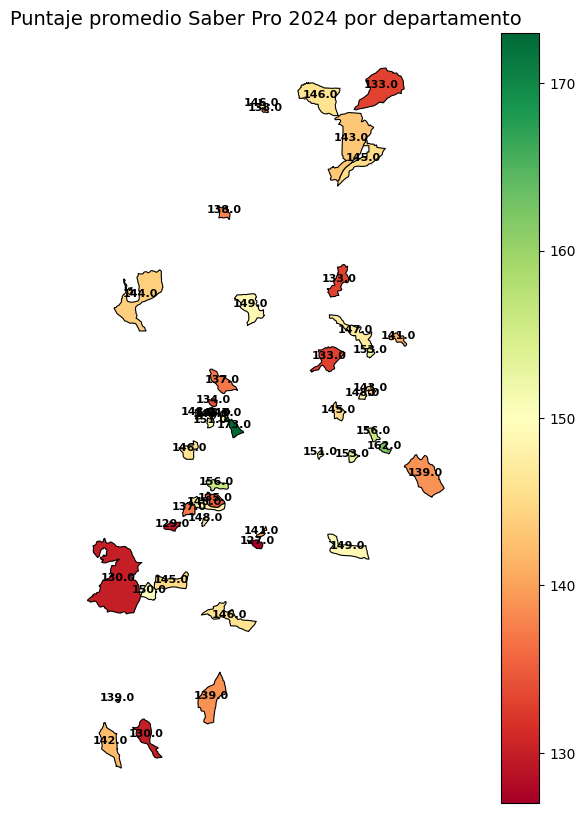

In [49]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10, 10))

colombia.plot(
    column='PROMEDIO_GLOBAL',
    cmap='RdYlGn',  # Rojo bajo → Verde alto
    missing_kwds={
        'color': 'lightgrey',       # Gris claro para los NaN
        'edgecolor': 'white',
        'label': 'Sin datos'
    },
    linewidth=0.8,
    edgecolor='black',
    legend=True,
    ax=ax
)

ax.set_title('Puntaje promedio Saber Pro 2024 por departamento', fontsize=14)
ax.axis('off')


# En lugar de mostrarlo en pantalla, guárdalo en archivo
#fig.savefig('mapas/mapa_saberpro.png', dpi=300, bbox_inches='tight')
print("✅ Mapa guardado como 'mapas/mapa_saberpro.png'")
for idx, row in colombia.iterrows():
    # Centroide del polígono
    if row['geometry'].geom_type == 'Polygon':
        x, y = row['geometry'].centroid.coords[0]
    else:  # Si el departamento tiene varios polígonos (ej. San Andrés)
        x, y = row['geometry'].representative_point().coords[0]

    # Valor del promedio
    valor = row['PROMEDIO_GLOBAL']
    if not pd.isna(valor):
        ax.text(
            x, y, f"{valor:.1f}",       # Mostrar con 1 decimal
            horizontalalignment='center',
            fontsize=8,
            fontweight='bold',
            color='black',
            path_effects=[]
        )

# Mostrar mapa
plt.show()